<a href="https://colab.research.google.com/github/AkshayaPadigela/Bike_Sharing_demand_prediction/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports and Warnings Suppression
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [ ]:
#Data Loading
data = pd.read_csv('/content/bikes.csv.zip',sep=',')

In [ ]:
display(data)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
#Initial Processing
data["date"] = data.dteday.apply(lambda x:x.split()[0])
data["weekday"]= data.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())

In [ ]:
#Feature Identification and Data Preparation
categoricalFeatureNames = ['season','holiday','workingday','weathersit','weekday','mnth','yr','hr']
numericalFeatureNames = ['temp','hum','windspeed','atempt']
dropFeatures = ['casual','cnt','dteday','date','registered']

In [ ]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')
data=data[pd.notnull(data['cnt'])].sort_values(by=['dteday'])
y=data['cnt']
data=data.drop(dropFeatures,axis=1)

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [ ]:
#Model Training
from sklearn.ensemble import RandomForestRegressor
rfModel=RandomForestRegressor(n_estimators=500)
rfModel.fit(X=X_train,y=np.log1p(y_train))
preds= rfModel.predict(X=X_test)

In [ ]:
#Evaluation
from math import log10
def rmsle(y,y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        Y_ = np.exp(y_)
    log1=np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2=np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
print("RMSLE Value For Random Forest:", rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False))

RMSLE Value For Random Forest: 0.2865730481182362


<Axes: xlabel='feature', ylabel='coefficient'>

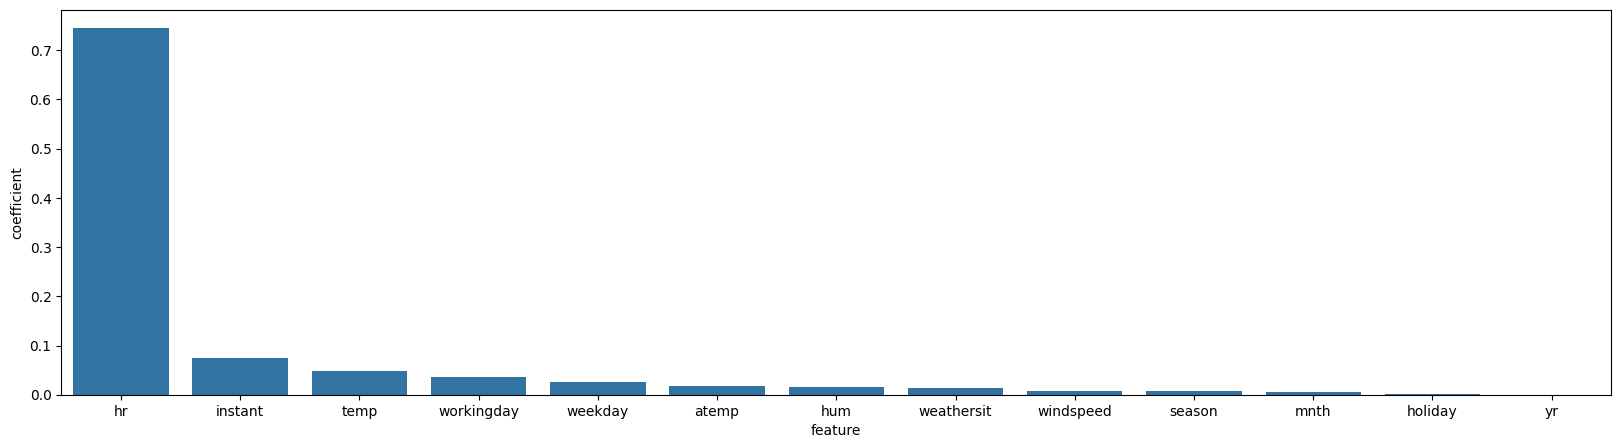

In [ ]:
#Feature Importance Visualization
features = pd.DataFrame()
features['feature'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'], ascending=False, inplace=True)
fig,ax=plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=features,x='feature',y='coefficient',ax=ax)